### Background on the Automatidata scenario

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

`The purpose of this project is to conduct exploratory data analysis on a provided data set. My mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables.`

##### Import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv',index_col=False)
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [3]:
# Describe data
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [4]:
# Information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is **no missing** data according to the results from the `info()` function.

### Data visualization

In [5]:
# Convert data columns to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

<Axes: title={'center': 'Box plot of trip distance'}, xlabel='Trip distances'>

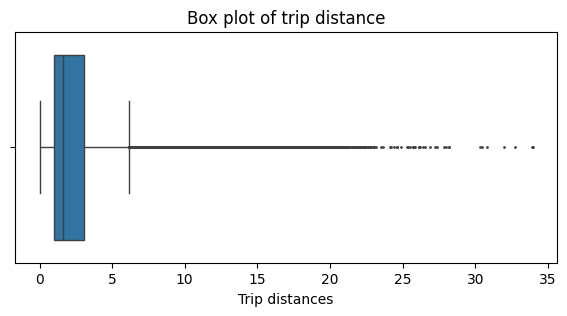

In [6]:
# Trip distance 

# create box plot of trip_distance 
plt.figure(figsize=(7,3))
plt.title('Box plot of trip distance')
plt.xlabel('Trip distances')
sns.boxplot(data=None, x= df['trip_distance'], fliersize=1)

Text(0, 0.5, 'Frequency')

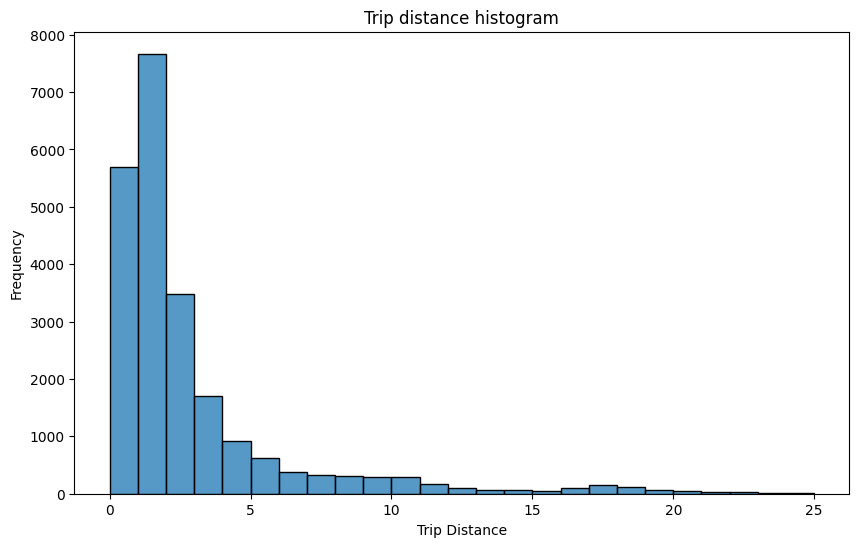

In [7]:
# Create histogram of trip_distance 
plt.figure(figsize=(10,6))
sns.histplot(df['trip_distance'], bins = range(0,26,1))
plt.title('Trip distance histogram')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')


<Axes: title={'center': 'Box plot of total amount'}, xlabel='Total amount'>

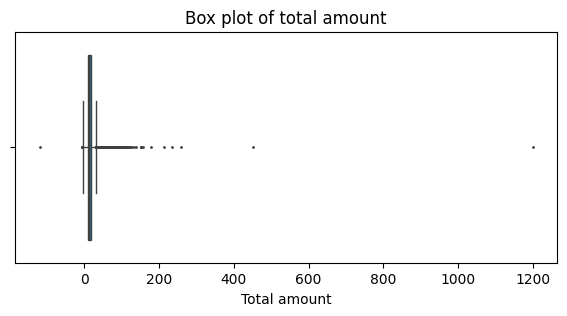

In [8]:
# total amount

# create box plot of total amount
plt.figure(figsize=(7,3))
plt.title('Box plot of total amount')
plt.xlabel('Total amount')

sns.boxplot(x=df['total_amount'],fliersize=1)

Text(0.5, 1.0, 'Total amount histogram')

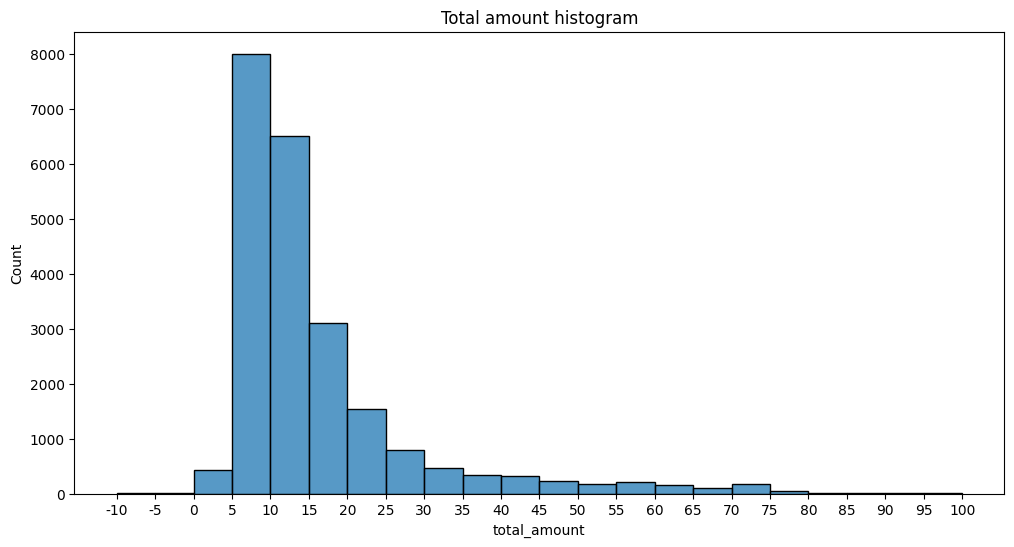

In [9]:
# Create histogram of total amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))

plt.title('Total amount histogram')


Text(0.5, 0, 'Tip amount')

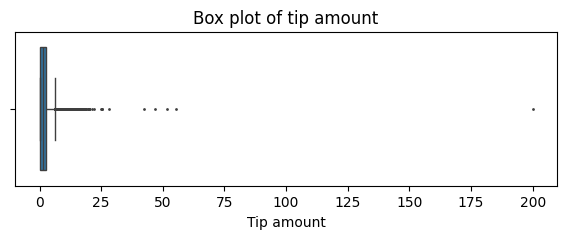

In [10]:
# tip_amount

plt.figure(figsize=(7,2))
sns.boxplot(x=df['tip_amount'],fliersize=1)
plt.title('Box plot of tip amount')
plt.xlabel('Tip amount')

Text(0, 0.5, 'Frequency')

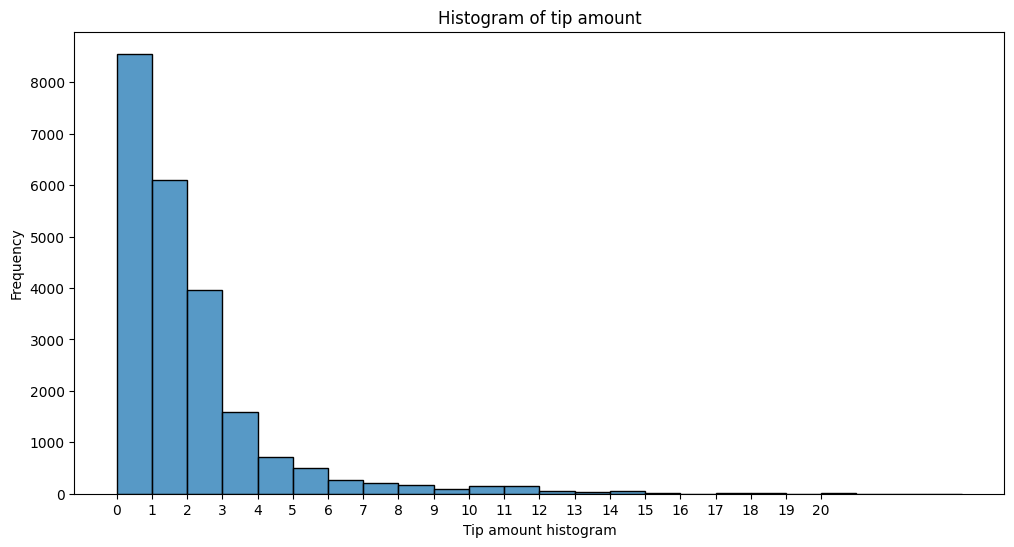

In [11]:
#Create histogram of tip amount
plt.figure(figsize=(12,6))
plt.title('Histogram of tip amount')
ax = sns.histplot(df['tip_amount'],bins=range(0,25,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.xlabel('Tip amount histogram')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Tip amount by vendor histogram')

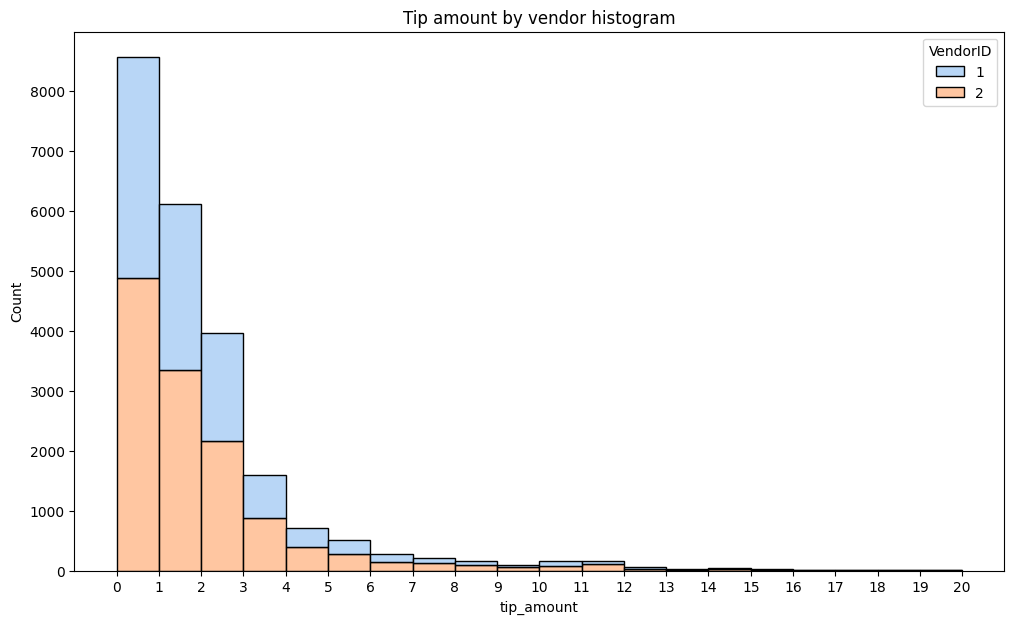

In [12]:
# Tip amount by vendor

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x = 'tip_amount', bins = range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')

Text(0.5, 1.0, 'Tip amount by vendor histogram ')

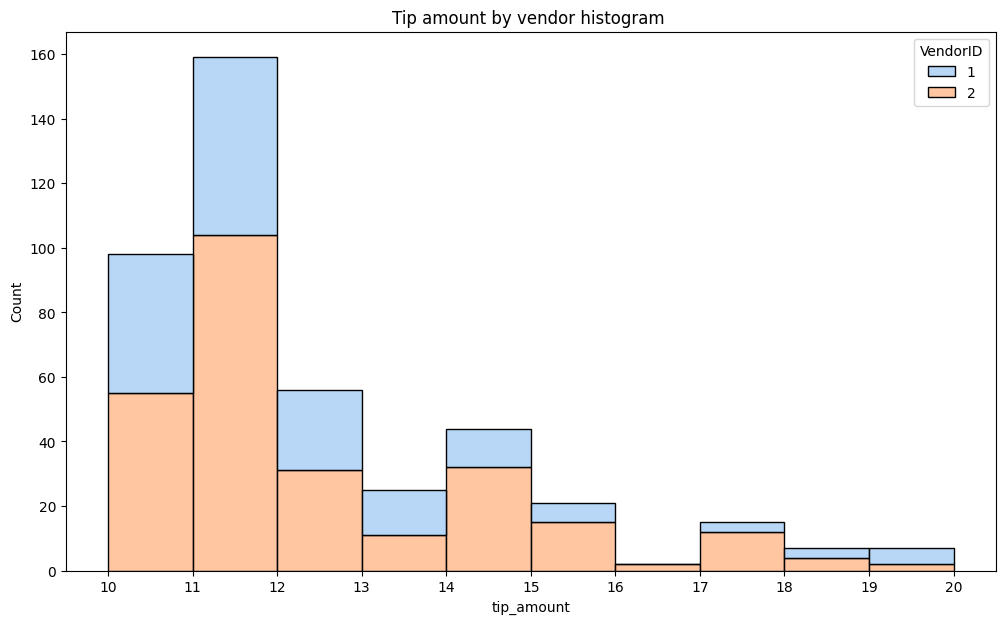

In [13]:
# create histogram of tip amount by vendor for tips > 10
tips_over_ten = df[df['tip_amount']> 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten,x='tip_amount', bins=range(10,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram ')

##### Means tip by passenger count

In [14]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [15]:
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()

# Hiển thị kết quả
mean_tips_by_passenger_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\926249808.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=data.values, palette=np.array(pal[::-1])[rank])
C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\926249808.py:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index, y=data.values, palette=np.array(pal[::-1])[rank])


Text(0, 0.5, 'Mean Tip Amount')

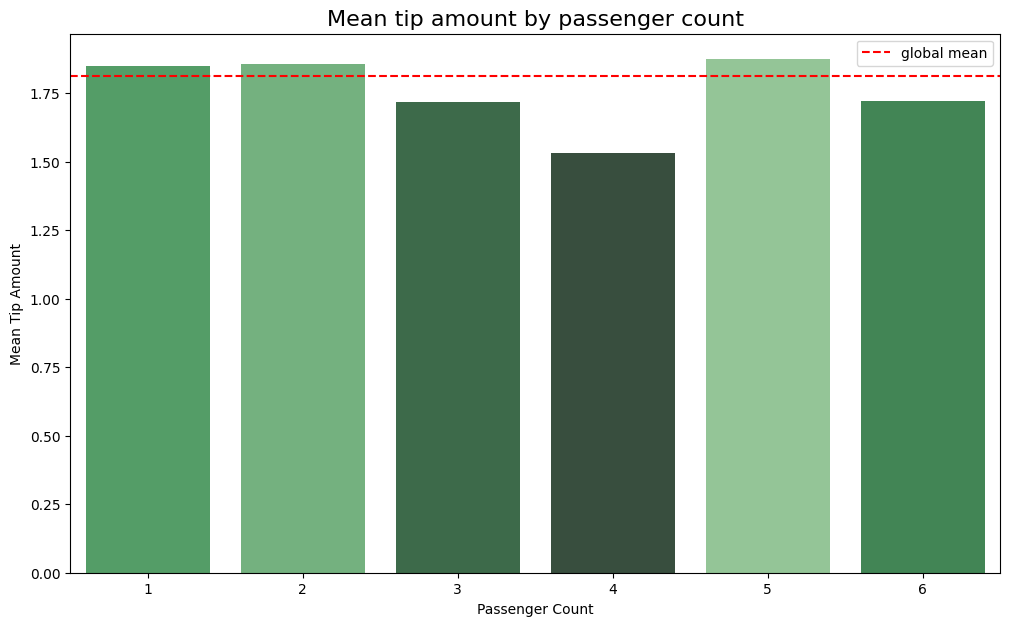

In [16]:

# Loại bỏ hàng có số lượng hành khách = 0
data = mean_tips_by_passenger_count[mean_tips_by_passenger_count.index != 0]

# Tạo bảng màu
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

# Vẽ biểu đồ
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index, y=data.values, palette=np.array(pal[::-1])[rank])

# Vẽ đường trung bình toàn cục
ax.axhline(mean_tips_by_passenger_count.mean(), ls='--', color='red', label='global mean')
ax.legend()

# Đặt tiêu đề và nhãn
plt.title('Mean tip amount by passenger count', fontsize=16)
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')


#### Create month and day columns

In [17]:
# create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


In [18]:
# get total number of rides for each month 
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [19]:
# Reorder the monthly ride list so months go in order
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_rides = monthly_rides.reindex(index=month_order)

monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\969202600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = monthly_rides.index,y = monthly_rides,palette=colors)
C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\969202600.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


Text(0, 0.5, 'Frequency')

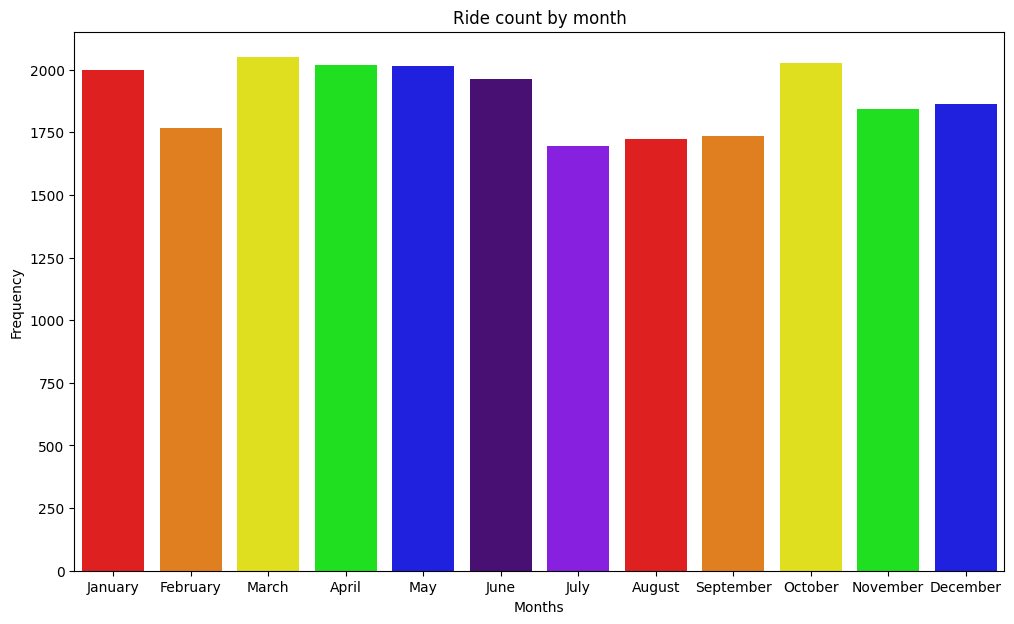

In [20]:
# Create a bar plot of total rides per month 
plt.figure(figsize=(12,7))
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF']

colors = rainbow_colors * (len(monthly_rides) // 7) + rainbow_colors[:len(monthly_rides) % 7]
ax = sns.barplot(x = monthly_rides.index,y = monthly_rides,palette=colors)
ax.set_xticklabels(month_order)
plt.title('Ride count by month')
plt.xlabel('Months')
plt.ylabel('Frequency')

##### Plot total ride count by day

In [21]:
daily_rides = df['day'].value_counts()
daily_rides

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\2545893706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = daily_rides.index,y = daily_rides, palette=colors)
C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\2545893706.py:3: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  ax = sns.barplot(x = daily_rides.index,y = daily_rides, palette=colors)
C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\2545893706.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Ride count by day')

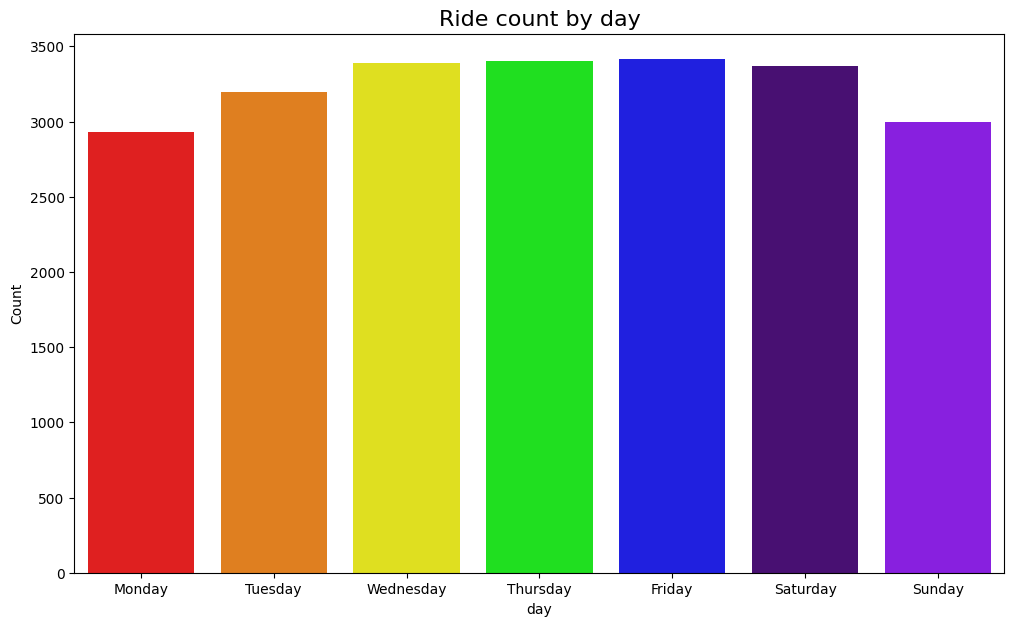

In [22]:
# create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x = daily_rides.index,y = daily_rides, palette=colors)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16)

##### plot total revenue by day of the week

In [23]:
total_amount_day = df.groupby('day')['total_amount'].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\3810497480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = total_amount_day.index, y = total_amount_day, palette='Oranges')
C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\3810497480.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Total revenue by day')

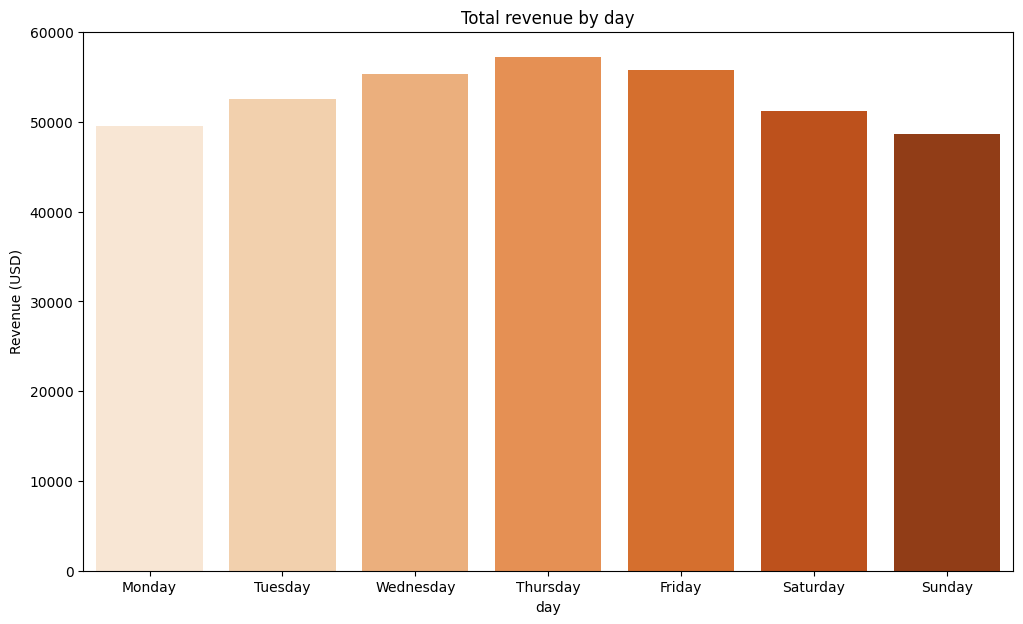

In [24]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day, palette='Oranges')
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day')


In [25]:
# Total revenue by month
total_amount_month = df.groupby('month')['total_amount'].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\2208645116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = total_amount_month.index, y = total_amount_month, palette='YlOrBr')


Text(0, 0.5, 'Revenue (USD)')

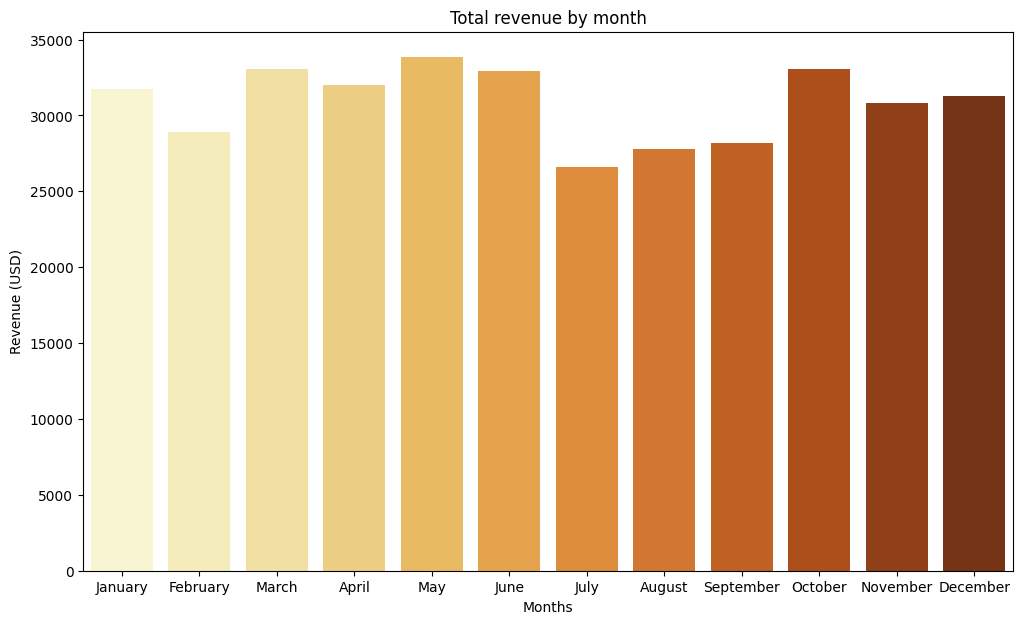

In [26]:
# Create a bar plot of total revenue by month 
plt.figure(figsize=(12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month, palette='YlOrBr')
ax.set_xlabel(month_order)
plt.title('Total revenue by month')
plt.xlabel('Months')
plt.ylabel('Revenue (USD)')

##### Plot mean trip distance by drop-off location

In [27]:
df['DOLocationID'].nunique()

216

In [28]:
# Caculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean()

# Sort the results in decending order by mean trip distance 
distance_by_dropoff = distance_by_dropoff.sort_values(ascending=True)
distance_by_dropoff

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\2169029710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff.index , y = distance_by_dropoff, order=distance_by_dropoff.index, palette='YlOrRd')


Text(0, 0.5, 'Trip distance')

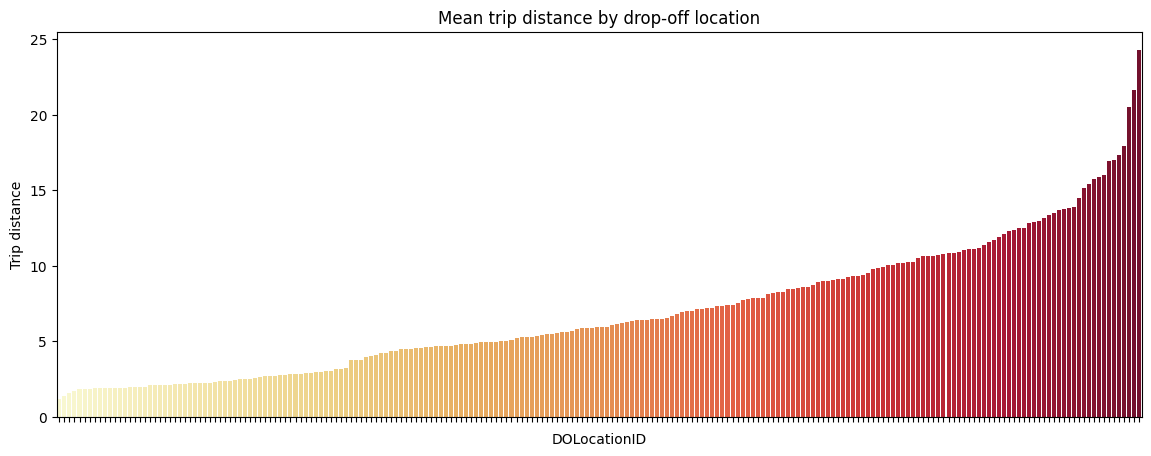

In [29]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance 
plt.figure(figsize=(14,5))
ax = sns.barplot(x=distance_by_dropoff.index , y = distance_by_dropoff, order=distance_by_dropoff.index, palette='YlOrRd')

ax.set_xticklabels([])
plt.title('Mean trip distance by drop-off location')
plt.ylabel('Trip distance')

`np.random.normal(10, 5, (3000, 2))`

`np.random.normal(mean, std_dev, size)` là hàm tạo ra các giá trị ngẫu nhiên từ phân phối chuẩn (Gaussian distribution).

`size = (3000, 2)` Hàm này sẽ tạo ra một mảng có 3000 hàng và 2 cột, tương ứng với 3000 cặp giá trị ngẫu nhiên

In [34]:
# 1. Generate random point on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test) / 2)
start = test[:midway]
end = test[midway:]

# 2. Calculate Euclidean distances between points in first half and second half of an array
distances = (start - end) ** 2
distances = distances.sum(axis=1)
distances = np.sqrt(distances)

# 3. Create DataFrame
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                        'end': [tuple(x) for x in end.tolist()],
                        'distance': distances})

# 4. Group by 'end' and calculate mean
data = test_df.groupby('end')[ 'distance'].mean()

# 5. Sort values by 'distance'
data = data.sort_values()

# 6. Output
data


end
(11.1, 4.6)      0.000000
(9.3, 17.8)      0.300000
(11.3, 8.9)      0.360555
(12.9, 18.0)     0.412311
(11.4, 5.7)      0.447214
                  ...    
(0.3, 1.7)      23.262201
(20.8, 11.6)    23.528068
(-1.1, 17.7)    23.581561
(20.8, -2.8)    24.750354
(-5.3, -1.5)    28.284625
Name: distance, Length: 1455, dtype: float64

C:\Users\minhp\AppData\Local\Temp\ipykernel_20876\680632054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=index_labels,


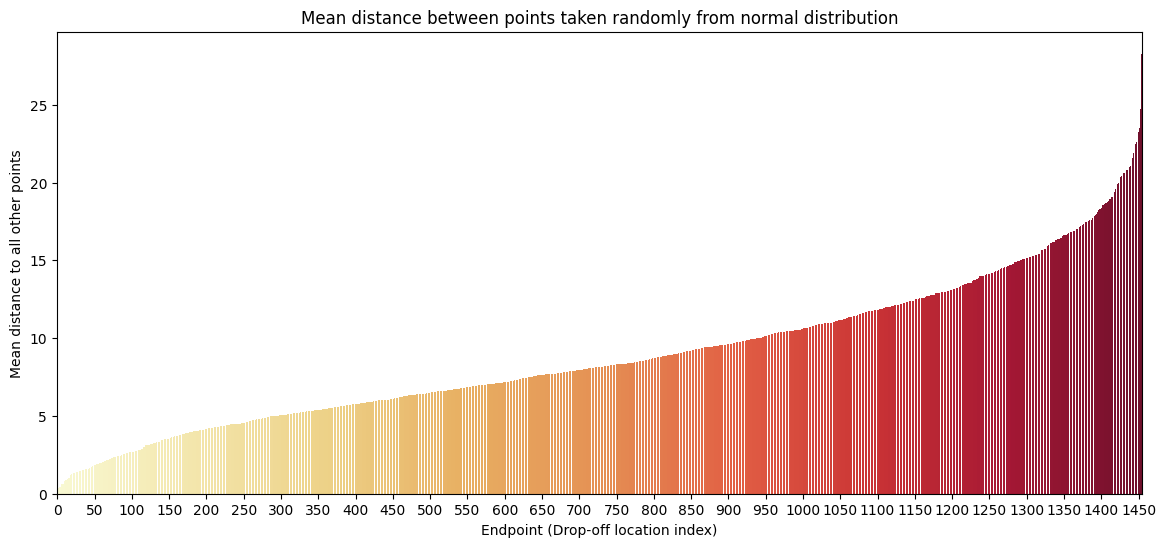

In [37]:
plt.figure(figsize=(14, 6))

# Sử dụng chỉ số cho các điểm thay vì hiển thị tuple trực tiếp trên trục x
index_labels = range(len(data))

# Vẽ biểu đồ
ax = sns.barplot(x=index_labels, 
                 y=data, 
                 palette='YlOrRd')

# Cài đặt nhãn và tiêu đề cho biểu đồ
ax.set_xticks(index_labels[::50])  # Hiển thị nhãn chỉ mỗi 50 giá trị trên trục x (tùy thuộc vào số lượng điểm)
ax.set_xlabel('Endpoint (Drop-off location index)')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')

# Hiển thị biểu đồ
plt.show()

Giả sử `DOLocationID` có các giá trị [1, 2, 3, 4, 5], thì :

    max(DOLocationID)  = 5

    len(set(DOLocationID)) = 5
    
    Hiệu số: 5 - 5 = 0, điều này cho thấy các ID này liên tiếp

In [38]:
# Check if all drop-off locations are consecutively numbered 
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

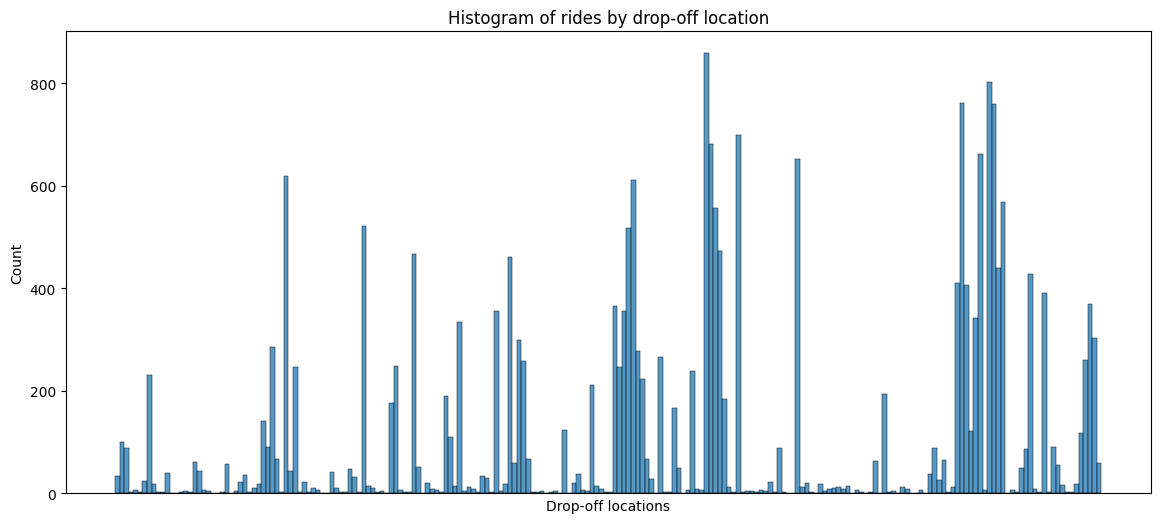

In [41]:
plt.figure(figsize=(14,6))
sorted_dropoffs = df['DOLocationID'].sort_values()
sorted_dropoffs = sorted_dropoffs.astype('str')

sns.histplot(sorted_dropoffs, bins=range(0,df['DOLocationID'].max()+1,1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location')